# Loan Application Status Prediction (Evaluation Project - 6)
Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.

Independent Variables:

Loan_ID

Gender

Married

Dependents

Education

Self_Employed

ApplicantIncome

CoapplicantIncome

Loan_Amount

Loan_Amount_Term

Credit History

Property_Area

Dependent Variable (Target Variable):
Loan_Status
You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.

In [1]:
#import some required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import r2_score,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
dt=pd.read_csv(r'C:\Users\Shalini Maurya\Desktop\dataset\Loan.csv')
dt.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


# EDA

In [5]:
dt.shape

(614, 13)

There are 614 rows and 13 column

In [6]:
#lets see some information about dataset
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
#lets remove the unuseful column:
dt.drop(columns=['Loan_ID'], axis=1,inplace=True)

In [7]:
dt

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
#Lets check the value count
for column in dt:
    print(column, "\n",dt[column].value_counts())

Gender 
 Male      489
Female    112
Name: Gender, dtype: int64
Married 
 Yes    398
No     213
Name: Married, dtype: int64
Dependents 
 0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Education 
 Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Self_Employed 
 No     500
Yes     82
Name: Self_Employed, dtype: int64
ApplicantIncome 
 2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
CoapplicantIncome 
 0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64
LoanAmount 
 120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64
Loan_Amount_Term 
 360.0    512
180.0     44
48

In [9]:
#lets check the null value
dt.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

7 columns are having missing values

In [10]:
#lets drop missing values
loan_dt=dt.dropna()

In [11]:
loan_dt.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Label Encoding

In [12]:
#value count of dependent column
loan_dt['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [13]:
#we will remove 3+ with 3 for better undersatnding and change the data type of it
loan_dt['Dependents']=loan_dt['Dependents'].replace('3+',3)
loan_dt['Dependents']=loan_dt['Dependents'].astype(float)

In [14]:
#lets check again
loan_dt['Dependents'].unique()

array([1., 0., 2., 3.])

# Univariate Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

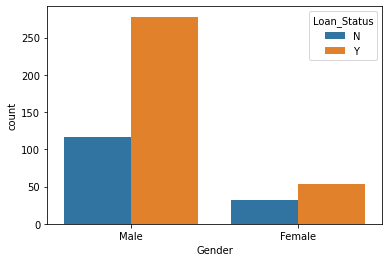

In [15]:
#lets check gender wise loan status
sns.countplot(x='Gender', hue='Loan_Status', data=loan_dt)

Mostly men take loan

<AxesSubplot:xlabel='Married', ylabel='count'>

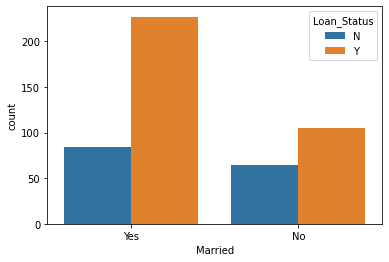

In [32]:
#lets check married one
sns.countplot(x='Married',hue='Loan_Status', data=loan_dt)

Mostly married people take loan

<AxesSubplot:xlabel='Education', ylabel='count'>

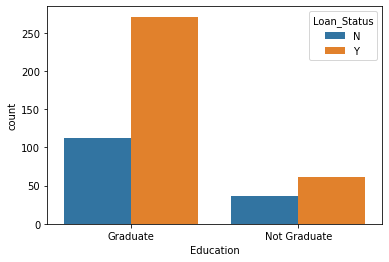

In [33]:
#loan status vs Education
sns.countplot(x='Education',hue='Loan_Status',data=loan_dt)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

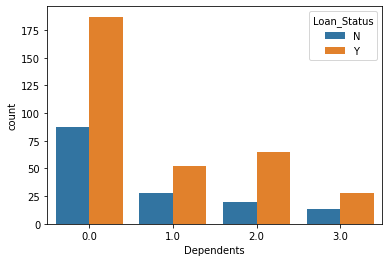

In [35]:
# Loan Status vs Dependents

sns.countplot(x="Dependents", data=loan_dt, hue="Loan_Status")

# Mostly people who have not any dependent on him take loans

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

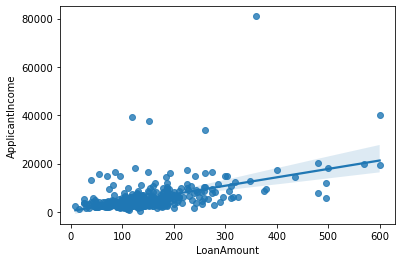

In [37]:
# Loan Amount vs Applicant Income

sns.regplot(x="LoanAmount", y="ApplicantIncome", data=loan_dt)

# It shows that Loan Amount is depend on their Income

<AxesSubplot:xlabel='LoanAmount', ylabel='CoapplicantIncome'>

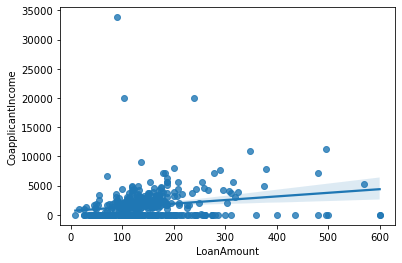

In [39]:
# Loan Amount vs CoapplicantIncome

sns.regplot(x="LoanAmount", y="CoapplicantIncome", data=loan_dt)

# It shows that Loan Amount is depend on his/her Coappliant Income

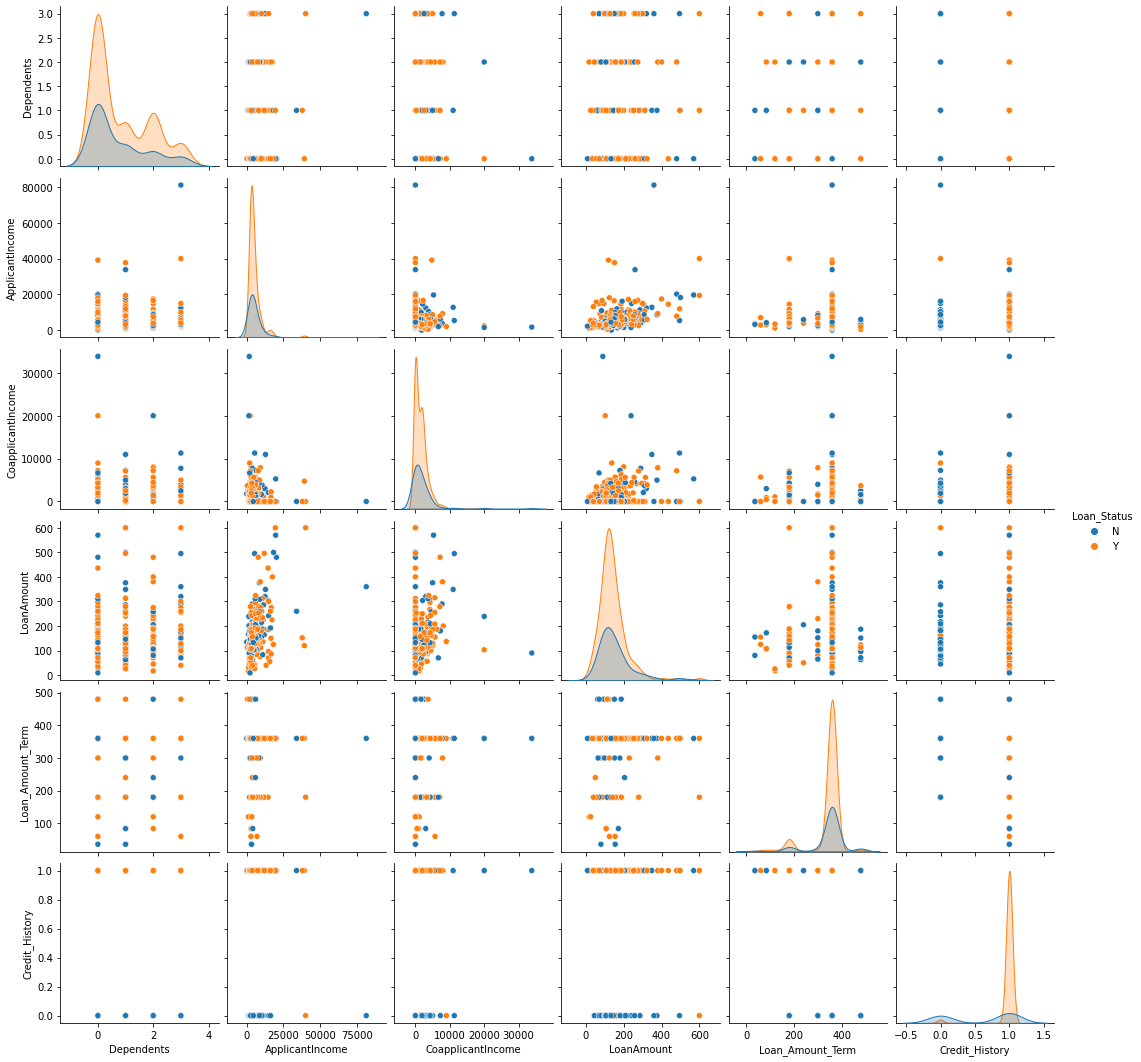

In [40]:
# Let's check the pairplot

sns.pairplot(loan_dt, hue="Loan_Status")

# Correlation

In [16]:
corr=loan_dt.corr()

In [17]:
corr

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Dependents,1.000000,0.131139,-0.000318,0.172780,-0.096361,-0.026651
ApplicantIncome,0.131139,1.000000,-0.112588,0.495310,-0.010838,-0.056152
CoapplicantIncome,-0.000318,-0.112588,1.000000,0.190740,-0.005775,-0.008692
LoanAmount,0.172780,0.495310,0.190740,1.000000,0.050867,-0.040773
Loan_Amount_Term,-0.096361,-0.010838,-0.005775,0.050867,1.000000,0.032937
Credit_History,-0.026651,-0.056152,-0.008692,-0.040773,0.032937,1.000000


Text(0.5, 1.0, 'Correlation between Features')

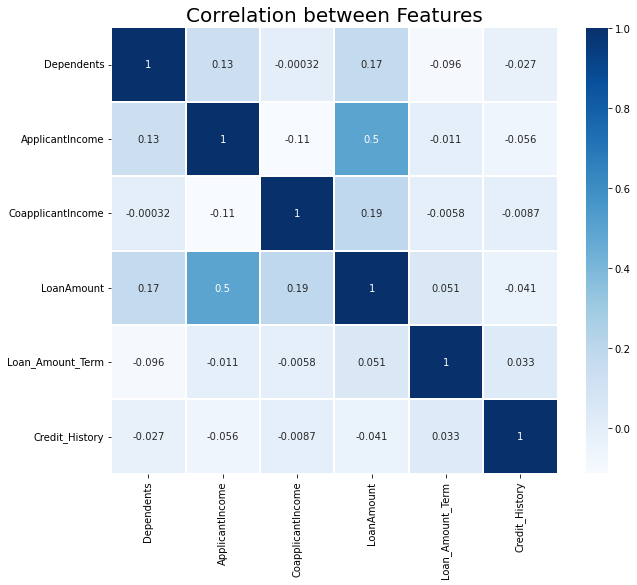

In [18]:
# Let's plot a heatmap for more clearity

plt.figure(figsize=(10,10))
sns.heatmap(corr, square=True, cbar=True, annot=True, cbar_kws={"shrink":.82}, annot_kws={"size":10},
            linewidth=.2, cmap="Blues",fmt=".2g")
plt.title("Correlation between Features", fontsize=20)

In [19]:
# Let's deal with Null values

categorical = loan_dt.select_dtypes(include=["object"]).columns.tolist()
numerical = loan_dt.select_dtypes(include=["int64", "float64"]).columns.tolist()

for column in loan_dt:
    if loan_dt[column].isnull().any():
        if column in categorical:
            loan_dt[column] = loan_dt[column].fillna(loan_dt[column].mode()[0])
        else:
            loan_dt[column] = loan_dt[column].fillna(loan_dt[column].mean())

In [20]:
# Let' again check the null value if any present...

feature_data = loan_dt.isnull().sum().keys().tolist()
values_data = loan_dt.isnull().sum().values.tolist()
missing_data = pd.DataFrame(list(zip(feature_data, values_data)), columns = ["Features", "Missing Data"])
missing_data["Missing %"] = round(((missing_data["Missing Data"]/loan_dt.shape[0])*100),2)

missing_data

,Features,Missing Data,Missing %
0,Gender,0,0.0
1,Married,0,0.0
2,Dependents,0,0.0
3,Education,0,0.0
4,Self_Employed,0,0.0
5,ApplicantIncome,0,0.0
6,CoapplicantIncome,0,0.0
7,LoanAmount,0,0.0
8,Loan_Amount_Term,0,0.0
9,Credit_History,0,0.0


In [21]:
#lets Check the skewness
loan_dt.skew()

Dependents           0.942272
ApplicantIncome      6.917027
CoapplicantIncome    5.881622
LoanAmount           2.361437
Loan_Amount_Term    -2.333710
Credit_History      -2.013253
dtype: float64

In [22]:
# Let's use zscore technique to remove the skewness

from scipy.stats import zscore

z = np.abs(zscore(loan_dt[numerical]))
loan_dt = loan_dt[(z<3).all(axis=1)]

In [23]:
#lets again check the skewness
loan_dt.skew()

Dependents           0.973964
ApplicantIncome      1.980989
CoapplicantIncome    1.405169
LoanAmount           1.064924
Loan_Amount_Term    -2.010659
Credit_History      -1.986572
dtype: float64

In [24]:
# Skewness Remove technique

for index in loan_dt.skew().index:
    if loan_dt.skew().loc[index]>0.5:
        loan_dt[index] = np.log1p(loan_dt[index])
    if loan_dt.skew().loc[index]<-0.5:
        loan_dt[index] = np.square(loan_dt[index])

In [25]:
#lets again check the skewness
loan_dt.skew()

Dependents           0.646236
ApplicantIncome     -0.047691
CoapplicantIncome   -0.182401
LoanAmount          -0.205289
Loan_Amount_Term    -0.873633
Credit_History      -1.986572
dtype: float64

Y    316
N    136
Name: Loan_Status, dtype: int64


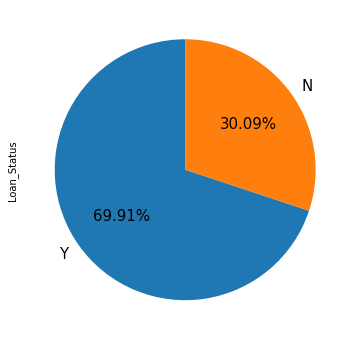

In [26]:
# Let's check the class imbalance of output column

print(loan_dt["Loan_Status"].value_counts())
loan_dt["Loan_Status"].value_counts().plot.pie(figsize=(6,6), startangle=90, autopct="%.2f%%", fontsize=15)

# Let's convert the target column to numerical

loan_dt["Loan_Status"] = loan_dt["Loan_Status"].replace({"Y":1, "N":0})

In [27]:
# Let's separate the input and output columns

x = loan_dt.drop(columns = ["Loan_Status"], axis=1)
y = loan_dt["Loan_Status"]

In [28]:
# Let first use one hot encoding technique to convert the categorical data to numerical

print("Shape before one hot encoding", x.shape)
x = pd.get_dummies(x, drop_first=True)
print("Shape after one hot encoding",x.shape)

Shape before one hot encoding (452, 11)
Shape after one hot encoding (452, 12)


In [29]:
# Removing Class imbalance issue

print("Shape before over_sampling : ",x.shape)
from imblearn.over_sampling import SMOTE

smt = SMOTE()
x,y = smt.fit_resample(x,y)
print("Shape after over_sampling : ",x.shape,"\n\n")

Shape before over_sampling :  (452, 12)
Shape after over_sampling :  (632, 12) 




0    316
1    316
Name: Loan_Status, dtype: int64


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

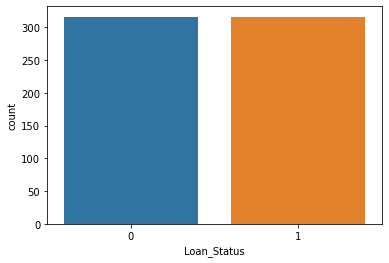

In [30]:
# Let' check the class imbalance issue solved or not

print(y.value_counts())
sns.countplot(y)

In [32]:
# Let's import some necessary libraries for model building

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, plot_roc_curve
from sklearn.model_selection import train_test_split, cross_val_score
from time import time

# Let's do scaling first

scaler = StandardScaler()
df_x = scaler.fit_transform(x)
df_x

array([[ 0.57666217,  0.20121736,  0.82212369, ..., -0.3298059 ,
        -0.67295881, -0.64824742],
       [-0.81092059, -0.57892198, -1.0811589 , ...,  3.03208647,
        -0.67295881,  1.54262087],
       [-0.81092059, -0.85443429,  0.93830695, ..., -0.3298059 ,
        -0.67295881,  1.54262087],
       ...,
       [ 1.00415787, -0.80727234,  0.77682832, ..., -0.3298059 ,
        -0.67295881, -0.64824742],
       [-0.81092059, -0.21154732, -1.0811589 , ..., -0.3298059 ,
        -0.67295881, -0.64824742],
       [ 0.16712823, -0.8961984 ,  0.98075514, ..., -0.3298059 ,
        -0.67295881,  1.54262087]])

In [36]:
# Let's find the best random state

def bestmodel(model):
    max_state = 0
    max_score = 0
    start = time()
    for i in range(1,201):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y, test_size=0.25, random_state=i)
        model.fit(x_train, y_train)
        y_pre = model.predict(x_test)
        score = accuracy_score(y_test, y_pre)
        if score > max_score:
            max_score = score
            max_state = i
    print("Best Random State is      : ",max_state)
    print("Best Accuracy Score is    : ",max_score)
    print("Cross Validation Score is : ",cross_val_score(model, df_x, y, cv=5).mean())
    end = time()
    print("Time taken by model for prediction : {:.4f} seconds".format(end-start))

In [39]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
bestmodel(LR)

Best Random State is      :  70
Best Accuracy Score is    :  0.8544303797468354
Cross Validation Score is :  0.7674415698037744
Time taken by model for prediction : 1.4466 seconds


In [43]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()
bestmodel(DTC)

Best Random State is      :  198
Best Accuracy Score is    :  0.8544303797468354
Cross Validation Score is :  0.7786776652918386
Time taken by model for prediction : 0.6195 seconds


In [45]:
# K-Neighbors Classifier

from sklearn.neighbors import KNeighborsClassifier

KNC = KNeighborsClassifier()
bestmodel(KNC)

Best Random State is      :  173
Best Accuracy Score is    :  0.8354430379746836
Cross Validation Score is :  0.7500937382827146
Time taken by model for prediction : 2.1093 seconds


In [46]:
# Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier()
bestmodel(GBC)

Best Random State is      :  97
Best Accuracy Score is    :  0.8734177215189873
Cross Validation Score is :  0.7993125859267592
Time taken by model for prediction : 22.7827 seconds


In [47]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
bestmodel(RFC)

Best Random State is      :  29
Best Accuracy Score is    :  0.8987341772151899
Cross Validation Score is :  0.8309211348581428
Time taken by model for prediction : 39.9776 seconds


In [48]:
# Support Vector Machine

from sklearn.svm import SVC

svc = SVC()
bestmodel(svc)

Best Random State is      :  4
Best Accuracy Score is    :  0.8670886075949367
Cross Validation Score is :  0.7801274840644918
Time taken by model for prediction : 4.9110 seconds


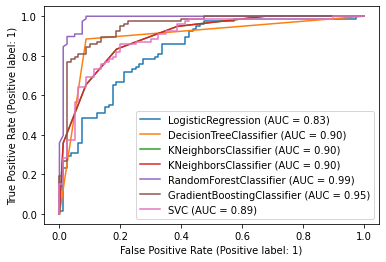

In [50]:
# Let's plot ROC AUC curve

x_train, x_test, y_train, y_test = train_test_split(df_x, y, test_size=0.25, random_state=88)

disp = plot_roc_curve(LR, x_test, y_test)
plot_roc_curve(DTC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(KNC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(KNC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(RFC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GBC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax=disp.ax_)

plt.legend(prop={"size" : 10}, loc="lower right")
plt.show()


After analyzing the Accuracy Score, Cross Validation Score and ROC AUC Curve of above models. Now it is clear that Random Forest Classifier is giving the best Accuracy Score. Let's try to increase the score of RFC using HyperParameterTuning.

In [51]:
# HyperParameter Tuning with RFC

from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators" : [100,200], "criterion" : ["gini", "entropy"],
             "min_samples_split" : [2,3], "min_samples_leaf" : [1,2]}

grid_search = GridSearchCV(RFC, param_grid)
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [52]:
# Final Model

Final_Model = RandomForestClassifier(n_estimators=200, criterion="gini", min_samples_split=2, min_samples_leaf=1)
x_train, x_test, y_train, y_test = train_test_split(df_x, y, test_size=0.25, random_state=79)
Final_Model.fit(x_train, y_train)
y_preds = Final_Model.predict(x_test)
accuracy_score(y_test, y_preds)

0.810126582278481

In [53]:
# Saving the Final Model

import joblib

joblib.dump(Final_Model,"Final_Model.pkl")

['Final_Model.pkl']